In [1]:
# Downloading dataset from dropbox

!wget https://www.dropbox.com/s/pqdn75uebkx8wha/Results%281%29.csv?dl=0
!wget https://www.dropbox.com/s/lij4749bj09wpie/Results%282%29.csv?dl=0
!wget https://www.dropbox.com/s/jkyoq33q37zos17/Results%283%29.csv?dl=0
!wget https://www.dropbox.com/s/eas8f93l3ydmb3j/Results%284%29.csv?dl=0
!wget https://www.dropbox.com/s/xjl3xw8m00kuxtc/Results%285%29.csv?dl=0
!wget https://www.dropbox.com/s/ihaxryvmwuilhh0/Results%286%29.csv?dl=0 
!wget https://www.dropbox.com/s/10c537lwrjwesoq/Results%287%29.csv?dl=0
!wget https://www.dropbox.com/s/qgnokd7v1qqgt4o/Results%288%29.csv?dl=0

--2019-09-20 19:14:37--  https://www.dropbox.com/s/pqdn75uebkx8wha/Results%281%29.csv?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.65.1, 2620:100:6021:1::a27d:4101
Connecting to www.dropbox.com (www.dropbox.com)|162.125.65.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/pqdn75uebkx8wha/Results%281%29.csv [following]
--2019-09-20 19:14:38--  https://www.dropbox.com/s/raw/pqdn75uebkx8wha/Results%281%29.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc00269876b05960b358584c9aef.dl.dropboxusercontent.com/cd/0/inline/Ao6UP1JePKscMKvCIZ_ahkDozPj3-_B49vR9LctNEa59SDVHB62fiymHVcJu0vpWpwKrF_VftYb5MTvdyaFOxv20CbBa5QCaIXhnkfxyBBItww/file# [following]
--2019-09-20 19:14:38--  https://uc00269876b05960b358584c9aef.dl.dropboxusercontent.com/cd/0/inline/Ao6UP1JePKscMKvCIZ_ahkDozPj3-_B49vR9LctNEa59SDVHB62fiymHVcJu0vpWpwKrF_VftYb5MTvdyaFOxv20CbBa5QCaIXhnkfxyBBItw

In [2]:
%matplotlib inline

!pip install pyLDAvis
import pyLDAvis.sklearn

import pickle
import seaborn as sns
import pandas as pd
import itertools
import numpy as np
import re, nltk, spacy, gensim
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from bs4 import BeautifulSoup
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import jaccard_score, make_scorer, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, cross_val_score, KFold, train_test_split
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import MultiLabelBinarizer, StandardScaler
from sklearn.svm import LinearSVC
from matplotlib.collections import LineCollection
from nltk.tokenize import ToktokTokenizer
from nltk.stem import wordnet
from nltk.corpus import stopwords
from string import punctuation

# We load our data and visualize the first 50 lines.

nltk.download("stopwords")
nltk.download("wordnet")
sns.set()

df_1 = pd.read_csv('Results(1).csv?dl=0')
df_2 = pd.read_csv('Results(2).csv?dl=0')
df_3 = pd.read_csv('Results(3).csv?dl=0')
df_4 = pd.read_csv('Results(4).csv?dl=0')
df_5 = pd.read_csv('Results(5).csv?dl=0')
df_6 = pd.read_csv('Results(6).csv?dl=0')
df_7 = pd.read_csv('Results(7).csv?dl=0')
df_8 = pd.read_csv('Results(8).csv?dl=0')
df = pd.concat([df_1, df_2, df_3, df_4, df_5, df_6, df_7, df_8])

df.head(50)

/usr/local/lib/python3.6/dist-packages/scipy/sparse/sparsetools.py:21: DeprecationWarning: `scipy.sparse.sparsetools` is deprecated!
scipy.sparse.sparsetools is a private module for scipy.sparse, and should not be used.
  _deprecated()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,Id,PostTypeId,AcceptedAnswerId,ParentId,CreationDate,DeletionDate,Score,ViewCount,Body,OwnerUserId,OwnerDisplayName,LastEditorUserId,LastEditorDisplayName,LastEditDate,LastActivityDate,Title,Tags,AnswerCount,CommentCount,FavoriteCount,ClosedDate,CommunityOwnedDate
0,4,1,7.0,NaN,2008-07-31 21:42:52,NaN,617,40863.0,<p>I want to use a track-bar to change a form'...,8.0,NaN,6786713.0,Rich B,2018-07-02 17:55:27,2019-01-17 13:39:48,Convert Decimal to Double?,<c#><floating-point><type-conversion><double><...,13.0,1,46.0,NaN,2012-10-31 16:42:47
1,6,1,31.0,NaN,2008-07-31 22:08:08,NaN,276,17804.0,<p>I have an absolutely positioned <code>div</...,9.0,NaN,63550.0,Rich B,2016-03-19 06:05:48,2018-12-15 03:57:18,Percentage width child element in absolutely p...,<html><css><css3><internet-explorer-7>,6.0,0,10.0,NaN,NaN
2,7,2,NaN,4.0,2008-07-31 22:17:57,NaN,420,NaN,<p>An explicit cast to double like this isn't ...,9.0,NaN,4020527.0,NaN,2017-12-16 05:06:57,2017-12-16 05:06:57,NaN,NaN,NaN,0,NaN,NaN,NaN
3,9,1,1404.0,NaN,2008-07-31 23:40:59,NaN,1742,538212.0,<p>Given a <code>DateTime</code> representing ...,1.0,NaN,3956566.0,Rich B,2018-04-21 17:48:14,2019-04-23 10:06:49,How do I calculate someone's age in C#?,<c#><.net><datetime>,63.0,7,424.0,NaN,2011-08-16 19:40:43
4,11,1,1248.0,NaN,2008-07-31 23:55:37,NaN,1428,146339.0,<p>Given a specific <code>DateTime</code> valu...,1.0,NaN,6479704.0,user2370523,2017-06-04 15:51:19,2019-05-26 02:31:53,Calculate relative time in C#,<c#><datetime><time><datediff><relative-time-s...,37.0,3,537.0,NaN,2009-09-04 13:15:59
5,12,2,NaN,11.0,2008-07-31 23:56:41,NaN,326,NaN,"<p>Here's how I do it</p>\n\n<pre class=""lang-...",1.0,NaN,1271898.0,GateKiller,2018-01-12 16:10:22,2018-01-12 16:10:22,NaN,NaN,NaN,11,NaN,NaN,2009-09-04 13:15:59
6,13,1,NaN,NaN,2008-08-01 00:42:38,NaN,574,171063.0,<p>Is there a standard way for a web server to...,9.0,NaN,9752662.0,Rich B,2018-12-24 22:47:42,2019-05-14 16:02:10,Determine a user's timezone,<html><browser><timezone><user-agent><timezone...,24.0,10,145.0,NaN,NaN
7,14,1,NaN,NaN,2008-08-01 00:59:11,NaN,393,119555.0,"<p>What is the difference between <a href=""htt...",11.0,Anonymous User,6495084.0,Rich B,2017-02-25 17:42:17,2018-09-19 03:49:19,Difference between Math.Floor() and Math.Trunc...,<.net><math>,10.0,4,56.0,NaN,NaN
8,16,1,12446.0,NaN,2008-08-01 04:59:33,NaN,122,81312.0,<p>How do you expose a LINQ query as an ASMX w...,2.0,NaN,567854.0,Chris Fournier,2019-01-20 13:50:51,2019-01-20 13:50:51,Filling a DataSet or DataTable from a LINQ que...,<c#><linq><web-services><.net-3.5>,6.0,0,14.0,NaN,NaN
9,17,1,26.0,NaN,2008-08-01 05:09:55,NaN,173,70957.0,"<p>How do I store binary data in <a href=""http...",2.0,NaN,546051.0,NaN,2011-10-21 21:29:17,2018-01-20 09:06:34,Binary Data in MySQL,<mysql><database><binary-data><data-storage>,9.0,3,19.0,2018-11-29 15:36:04,NaN


In [3]:
df = df[['Tags', 'Body']]
print(df.shape)
df.head(50)

(328500, 2)


,Tags,Body
0,<c#><floating-point><type-conversion><double><...,<p>I want to use a track-bar to change a form'...
1,<html><css><css3><internet-explorer-7>,<p>I have an absolutely positioned <code>div</...
2,NaN,<p>An explicit cast to double like this isn't ...
3,<c#><.net><datetime>,<p>Given a <code>DateTime</code> representing ...
4,<c#><datetime><time><datediff><relative-time-s...,<p>Given a specific <code>DateTime</code> valu...
5,NaN,"<p>Here's how I do it</p>\n\n<pre class=""lang-..."
6,<html><browser><timezone><user-agent><timezone...,<p>Is there a standard way for a web server to...
7,<.net><math>,"<p>What is the difference between <a href=""htt..."
8,<c#><linq><web-services><.net-3.5>,<p>How do you expose a LINQ query as an ASMX w...
9,<mysql><database><binary-data><data-storage>,"<p>How do I store binary data in <a href=""http..."


# Applying pre-processing functions

In [0]:
def count_tag(data, ref_col, list_words): 
    ''' Count the number of occurrences and the average score for each tag
    
    Parameters:
    
        data (dataframe): dataframe to use 
        ref_col (serie): column of dataframe containing tags
        list_words (list): list of different tags
    '''
    
    keyword_count = dict()
    index = -1
    
    for s in list_words: 
        keyword_count[s] = []
        keyword_count[s].append(0)
        keyword_count[s].append(0)
        
    for list_keywords in data[ref_col].str.split('>'): 
        
        if type(list_keywords) == float and pd.isnull(list_keywords): 
            continue
        
        index += 1
            
        for s in [s for s in list_keywords if s in list_words]: 
            if pd.notnull(s):
                keyword_count[s][0] += 1
                    
    # conversion of our dictionary into a list
    keyword_occurences = []
    
    for tag, item in keyword_count.items():
        keyword_occurences.append([tag[1:], item[0], item[1]/item[0]])
        
    keyword_occurences.sort(key = lambda x:x[1], reverse = True)
    
    return keyword_occurences

In [5]:
# Making a list of the different tags 

set_tags = set()
scoring = list()

for list_keywords in df['Tags'].str.split('>').values:
    
    if isinstance(list_keywords, float): 
        continue 

    set_tags = set_tags.union(list_keywords)
    
print('There are %d tags' % len(set_tags))

There are 12441 tags


In [0]:
# I decided to keep the 400 most popular tags because they represent more than 95%
# of all the posts, and also because it'll be easier to predict the right tags
# from 400 words than from 12,000 and because we want to keep macro tags and 
# not be too specific since it's only a recommendation for a post

keyword_occurences = count_tag(df, 'Tags', set_tags)
trunc_occurences = keyword_occurences[1:401]
top_tags = [i[0] for i in trunc_occurences]

def most_common(tags):
    ''' keep only the tags that are part of the 400 most used tags
    on StackOverflow

    tags: tags associated to post
    '''
    
    clean_tags = str(tags).split('>')[:-1]
    tags_filtered = []
    
    for tag in clean_tags:
        
        if tag[1:] in top_tags:
            tags_filtered.append(tag[1:])
            
    return tags_filtered

In [0]:
df['Tags'] = df['Tags'].apply(lambda x: most_common(x))
df['Tags'] = df['Tags'].apply(lambda x: x if len(x)>0 else None)

In [8]:
df.dropna(subset=['Tags'], inplace=True)
df.shape

(95672, 2)

In [9]:
df.head(5)

,Tags,Body
0,"[c#, floating-point]",<p>I want to use a track-bar to change a form'...
1,"[html, css]",<p>I have an absolutely positioned <code>div</...
3,"[c#, .net, datetime]",<p>Given a <code>DateTime</code> representing ...
4,"[c#, datetime, time]",<p>Given a specific <code>DateTime</code> valu...
6,"[html, browser, timezone]",<p>Is there a standard way for a web server to...


In [0]:
def clean_text(text):
    ''' Lowering text and removing undesirable marks

    Parameter:
    
    text: document to be cleaned    
    '''
    
    text = text.lower()
    text = re.sub(r"\'\n", " ", text)
    text = re.sub(r"\'\xa0", " ", text)
    text = re.sub('\s+', ' ', text) # matches all whitespace characters
    text = text.strip(' ')
    return text

In [0]:
df['Body'] = df['Body'].apply(lambda x: clean_text(x))

In [0]:
# the text of the post, without tags or markup
df['Body'] = df['Body'].apply(lambda x: BeautifulSoup(x).get_text())

In [0]:
token = ToktokTokenizer()
punct = punctuation

In [0]:
def strip_list_noempty(mylist):
    
    newlist = (item.strip() if hasattr(item, 'strip') else item for item in mylist)
    
    return [item for item in newlist if item != '']

In [0]:
def clean_punct(text): 
    ''' Remove all the punctuation from text, unless it's part of an important 
    tag (ex: c++, c#, etc)

    Parameter:
    
    text: document to remove punctuation from it
    '''

    words = token.tokenize(text)
    punctuation_filtered = []
    regex = re.compile('[%s]' % re.escape(punct))
    remove_punctuation = str.maketrans(' ', ' ', punct)
    
    for w in words:
        if w in top_tags:
            punctuation_filtered.append(w)
        else:
            w = re.sub('^[0-9]*', " ", w)
            punctuation_filtered.append(regex.sub('', w))
  
    filtered_list = strip_list_noempty(punctuation_filtered)
        
    return ' '.join(map(str, filtered_list))


In [0]:
stop_words = set(stopwords.words("english"))

In [0]:
def stopWordsRemove(text):
    ''' Removing all the english stop words from a corpus

    Parameter:

    text: document to remove stop words from it
    '''

    words = token.tokenize(text)
    filtered = [w for w in words if not w in stop_words]
    
    return ' '.join(map(str, filtered))

In [0]:
nlp = spacy.load('en', disable=['parser', 'ner'])

def lemmatization(texts, allowed_postags, stop_words=stop_words):
    ''' It keeps the lemma of the words (lemma is the uninflected form of a word),
    and deletes the underired POS tags
    
    Parameters:
    
    texts (list): text to lemmatize
    allowed_postags (list): list of allowed postags, like NOUN, ADL, VERB, ADV
    '''
    
    lemma = wordnet.WordNetLemmatizer()       
    doc = nlp(texts) 
    texts_out = []
    
    for token in doc:
        
        if str(token) in top_tags:
            texts_out.append(str(token))
            
        elif token.pos_ in allowed_postags:
            
            if token.lemma_ not in ['-PRON-']:
                texts_out.append(token.lemma_)
                
            else:
                texts_out.append('')
     
    texts_out = ' '.join(texts_out)

    return texts_out

In [0]:
df['Body'] = df['Body'].apply(lambda x: clean_punct(x)) 
df['Body'] = df['Body'].apply(lambda x: stopWordsRemove(x)) 
df['Body'] = df['Body'].apply(lambda x: lemmatization(x, ['NOUN', 'ADV']))

In [0]:
# Sampling dataset
vectorizer_X = TfidfVectorizer(analyzer='word', min_df=0.0, max_df = 1.0, 
                                   strip_accents = None, encoding = 'utf-8', 
                                   preprocessor=None, 
                                   token_pattern=r"(?u)\S\S+", # Need to repeat token pattern
                                   max_features=1000)

# Binarizing the tags for the supervised models
multilabel_binarizer = MultiLabelBinarizer()
y_target = multilabel_binarizer.fit_transform(df['Tags'])

# 80/20 split
X_train, X_test, y_train, y_test = train_test_split(
    df['Body'], y_target, test_size=0.2,train_size=0.8, random_state=0)

# TF-IDF matrices
X_tfidf_train = vectorizer_X.fit_transform(X_train)
X_tfidf_test = vectorizer_X.transform(X_test)

In [0]:
# Sampling dataset for 2gram model

vectorizer_X_2gram = TfidfVectorizer(analyzer='word', min_df=0.0, max_df = 1.0, 
                                   strip_accents = None, encoding = 'utf-8', 
                                   preprocessor=None, ngram_range=(2,2),
                                   token_pattern=r"(?u)\S\S+", # Need to repeat token pattern
                                   max_features=1000)

# 80/20 split
X_2gram_train, X_2gram_test, y_2gram_train, y_2gram_test = train_test_split(
    df['Body'], df['Tags'], test_size=0.2,train_size=0.8, random_state=0)

# TF-IDF matrices
X_2gram_tfidf_train = vectorizer_X_2gram.fit_transform(X_2gram_train)
X_2gram_tfidf_test = vectorizer_X_2gram.transform(X_2gram_test)

# Unsupervised models using LDA

In [0]:
def print_top_words(model, feature_names, n_top_words, data):
    ''' It shows the top words from the different clusters of a model
    
    Parameters:
    
    model: model 
    feature_names: different words to show 
    n_top_words (int): number of words to print for each feature 
    data: data for the model
    '''

    list_topics = []
    list_occurences = []
    n_topics = model.n_components

    for i in model.transform(data):
        list_topics.append(i.argmax())
    
    for topic in range(n_topics):
        list_occurences.append(list_topics.count(topic))

    top_topics = sorted(range(len(list_occurences)), 
                        key=lambda k: list_occurences[k], reverse=True)
    
    for topic_idx, topic_id in zip(range(1, n_topics + 1), top_topics):
        message = "Tag #%d: " % topic_idx
        message += " / ".join([feature_names[i]
                             for i in model.components_[topic_id].argsort()[:-n_top_words - 1:-1]])
        print(message)
    
    print()

In [0]:
def lda(vectorizer, data_train, data_test):

    ''' Showing the perplexity score for several LDA models with different values
    for n_components parameter, and printing the top words for the best LDA model
    (the one with the lowest perplexity)

    Parameters:

    vectorizer: TF-IDF convertizer                                              
    data_train: data to fit the model with
    data_test: data to test
    '''

    # number of topics 
    n_top_words = 15
    best_perplexity = np.inf
    best_lda = 0
    perplexity_list = []
    n_topics_list = []
    print("Extracting term frequency features for LDA...")

    for n_topics in np.linspace(10, 50, 5, dtype='int'):
        lda_model = LatentDirichletAllocation(n_components=n_topics, max_iter=5,
                                        learning_method='online',
                                        learning_offset=50.,
                                        random_state=0).fit(data_train)
        n_topics_list.append(n_topics)
        perplexity = lda_model.perplexity(data_test)
        perplexity_list.append(perplexity)

        # Perplexity is defined as exp(-1. * log-likelihood per word)
        # Perplexity: The smaller the better
        if perplexity <= best_perplexity:
            best_perplexity = perplexity
            best_lda = lda_model
                                
    plt.title("Evolution of perplexity score depending on number of topics")
    plt.xlabel("Number of topics")
    plt.ylabel("Perplexity")
    plt.plot(n_topics_list, perplexity_list)
    plt.show()

    print("\n The tags in the LDA model :")
    tf_feature_names = vectorizer.get_feature_names()
    print_top_words(best_lda, tf_feature_names, n_top_words, data_test)

Extracting term frequency features for LDA...


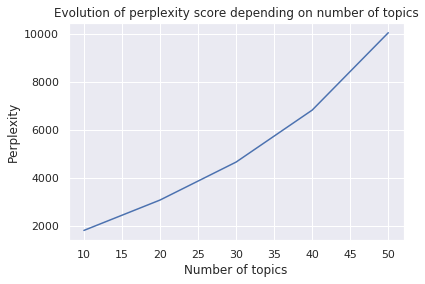


 The tags in the LDA model :
Tag #1: application / server / web / service / project / code / file / app / user / time / client / use / git / way / test
Tag #2: class / object / method / string / foo / exception / code / return / type / function / static / value / name / null / test
Tag #3: int / memory / code / byte / function / string / char / c++ / std / value / const / return / bit / compiler / way
Tag #4: file / project / directory / path / folder / eclipse / xml / version / build / way / studio / error / dll / source / code
Tag #5: image / button / view / text / control / window / event / wpf / user / way / color / controller / form / application / binding
Tag #6: page / javascript / html / jquery / url / function / browser / css / tag / div / input / request / content / element / var
Tag #7: table / sql / query / database / select / column / date / row / mysql / datum / server / field / value / record / join
Tag #8: string / list / array / character / value / way / item / elemen

In [24]:
# LDA model (BOW)

lda(vectorizer_X, X_tfidf_train, X_tfidf_test)

In [25]:
best_lda = LatentDirichletAllocation(n_components=10, max_iter=5,
                                        learning_method='online',
                                        learning_offset=50.,
                                        random_state=0).fit(X_tfidf_train)

pyLDAvis.enable_notebook()
panel = pyLDAvis.sklearn.prepare(best_lda, X_tfidf_test, vectorizer_X, mds='tsne')
panel

PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
8      146.191864 -235.831863       1        1  19.483805
3     -269.592834 -119.570786       2        1  14.475835
1      213.356247  300.001038       3        1  11.163155
5      -82.042641 -306.765594       4        1   9.911740
2      400.888336  112.767357       5        1   9.477138
0      369.380005 -150.336624       6        1   9.010071
7      169.074341   32.516193       7        1   8.631920
4     -238.120651  143.552399       8        1   7.021289
6      -14.964812  229.228973       9        1   5.477512
9      -37.826542  -39.181496      10        1   5.347534, topic_info=    Category        Freq         Term       Total  loglift  logprob
868  Default  303.000000        table  303.000000  30.0000  30.0000
344  Default  682.000000         file  682.000000  29.0000  29.0000
842  Default  499.000000       string  499.000000  28.0000  28.0000
824  Default  212.000000          sql  212.000000  27.0000  27.0000
698  Default  181.000000        query  181.000000  26.0000  26.0000
218  Default  233.000000     database  233.000000  25.0000  25.0000
152  Default  197.000000      command  197.000000  24.0000  24.0000
762  Default  204.000000       script  204.000000  23.0000  23.0000
149  Default  167.000000       column  167.000000  22.0000  22.0000
419  Default  175.000000         html  175.000000  21.0000  21.0000
469  Default  202.000000   javascript  202.000000  20.0000  20.0000
485  Default  194.000000     language  194.000000  19.0000  19.0000
696  Default  267.000000       python  267.000000  18.0000  18.0000
612  Default  252.000000         page  252.000000  17.0000  17.0000
52   Default  179.000000        array  179.000000  16.0000  16.0000
771  Default  206.000000       select  206.000000  15.0000  15.0000
139  Default  503.000000        class  503.000000  14.0000  14.0000
975  Default  229.000000      windows  229.000000  13.0000  13.0000
673  Default  168.000000      process  168.000000  12.0000  12.0000
472  Default  131.000000       jquery  131.000000  11.0000  11.0000
131  Default  144.000000    character  144.000000  10.0000  10.0000
507  Default  289.000000         list  289.000000   9.0000   9.0000
499  Default  217.000000      library  217.000000   8.0000   8.0000
254  Default  191.000000   difference  191.000000   7.0000   7.0000
220  Default  133.000000         date  133.000000   6.0000   6.0000
432  Default  199.000000        image  199.000000   5.0000   5.0000
468  Default  291.000000         java  291.000000   4.0000   4.0000
259  Default  147.000000    directory  147.000000   3.0000   3.0000
503  Default  292.000000         line  292.000000   2.0000   2.0000
747  Default  130.000000          row  130.000000   1.0000   1.0000
..       ...         ...          ...         ...      ...      ...
919  Topic10   28.425428     tutorial   44.286157   2.4851  -4.7844
539  Topic10   47.806878        match   74.509787   2.4848  -4.2645
540  Topic10   15.499294         math   24.191627   2.4833  -5.3909
659  Topic10   12.891026        power   20.215561   2.4786  -5.5751
682  Topic10   67.738546  programming  108.862788   2.4541  -3.9160
942  Topic10   33.073077     username   55.390773   2.4128  -4.6329
485  Topic10  110.852147     language  194.550247   2.3660  -3.4235
704  Topic10   35.021457         rail   61.763370   2.3612  -4.5757
91   Topic10   36.502538         book   69.051726   2.2911  -4.5343
357  Topic10   17.369431        flash   33.524806   2.2710  -5.2770
878  Topic10   31.993771         term   62.304583   2.2620  -4.6661
297  Topic10   27.441792       engine   55.123715   2.2310  -4.8196
619  Topic10   14.178302        parse   29.378442   2.2000  -5.4800
254  Topic10   90.601938   difference  191.958663   2.1777  -3.6252
462  Topic10   43.262145       iphone   92.223469   2.1716  -4.3644
499  Topic10   82.174865      library  217.566938   1.9549  -3.72

Extracting term frequency features for LDA...


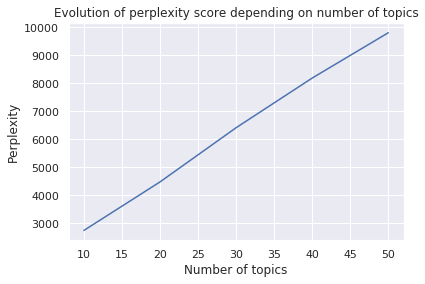


 The tags in the LDA model :
Tag #1: web service / class class / code code / string name / way way / item item / wcf service / java code / solution problem / function call / example class / username password / jar file / server side / php script
Tag #2: catch exception / file name / sample code / source file / table column / design pattern / file line / python script / work well / line line / database table / image image / windows forms / default value / column table
Tag #3: sql server / string string / text file / pro con / object sender / linq sql / windows service / piece code / runat server / memory leak / type textjavascript / xml document / memory usage / return null / windows application
Tag #4: error error / foo bar / end end / function function / input type / event handler / function return / time time / foo foo / log file / question answer / header file / user input / std string / error code
Tag #5: unit test / value value / int int / static string / string arg / code class 

In [26]:
# 2gram model without code lines

lda(vectorizer_X_2gram, X_2gram_tfidf_train, X_2gram_tfidf_test)

In [27]:
best_lda = LatentDirichletAllocation(n_components=10, max_iter=5,
                                        learning_method='online',
                                        learning_offset=50.,
                                        random_state=0).fit(X_2gram_tfidf_train)

pyLDAvis.enable_notebook()
panel = pyLDAvis.sklearn.prepare(best_lda, X_2gram_tfidf_test, vectorizer_X_2gram, mds='tsne')
panel

PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
3      -60.116924 -329.914978       1        1  11.086236
2      118.612320   16.203129       2        1  10.705878
5     -144.527145  404.588806       3        1  10.237468
0      160.287781  308.003998       4        1  10.204031
1     -108.027992  -79.299553       5        1  10.142267
8      362.017883   75.835411       6        1   9.933929
9      211.770294 -224.853790       7        1   9.888276
6     -348.753906 -157.683243       8        1   9.441217
7     -341.343872  139.133255       9        1   9.420142
4      -77.270279  164.789780      10        1   8.940556, topic_info=    Category        Freq                  Term       Total  loglift  logprob
743  Default  215.000000            sql server  215.000000  30.0000  30.0000
175  Default  154.000000          command line  154.000000  29.0000  29.0000
955  Default  125.000000       web application  125.000000  28.0000  28.0000
824  Default  119.000000         thank advance  119.000000  27.0000  27.0000
734  Default  107.000000           source code  107.000000  26.0000  26.0000
962  Default   97.000000           web service   97.000000  25.0000  25.0000
46   Default   90.000000           asp.net mvc   90.000000  24.0000  24.0000
277  Default   84.000000         error message   84.000000  23.0000  23.0000
321  Default   83.000000             file file   83.000000  22.0000  22.0000
860  Default   82.000000             unit test   82.000000  21.0000  21.0000
615  Default   77.000000  programming language   77.000000  20.0000  20.0000
724  Default   75.000000        something else   75.000000  19.0000  19.0000
777  Default   72.000000         string string   72.000000  18.0000  18.0000
989  Default   67.000000              xml file   67.000000  17.0000  17.0000
959  Default   67.000000              web page   67.000000  16.0000  16.0000
2    Default   65.000000        .net framework   65.000000  15.0000  15.0000
909  Default   66.000000           value value   66.000000  14.0000  14.0000
954  Default   63.000000               web app   63.000000  13.0000  13.0000
317  Default   62.000000        file directory   62.000000  12.0000  12.0000
28   Default   61.000000            anyone way   61.000000  11.0000  11.0000
673  Default   56.000000          return value   56.000000  10.0000  10.0000
432  Default   58.000000               int int   58.000000   9.0000   9.0000
23   Default   56.000000           anyone idea   56.000000   8.0000   8.0000
351  Default   57.000000               foo bar   57.000000   7.0000   7.0000
272  Default   58.000000           error error   58.000000   6.0000   6.0000
473  Default   56.000000             line code   56.000000   5.0000   5.0000
754  Default   56.000000         static string   56.000000   4.0000   4.0000
262  Default   55.000000               end end   55.000000   3.0000   3.0000
17   Default   55.000000       answer question   55.000000   2.0000   2.0000
370  Default   52.000000     function function   52.000000   1.0000   1.0000
..       ...         ...                   ...         ...      ...      ...
724  Topic10   75.638792        something else   75.858842   2.4117  -3.2142
673  Topic10   56.624626          return value   56.844681   2.4107  -3.5037
143  Topic10   48.092696          code example   48.312745   2.4100  -3.6670
799  Topic10   45.611398           table table   45.831456   2.4098  -3.7200
19   Topic10   43.793114           anyone else   44.013166   2.4096  -3.7607
442  Topic10   41.243492     internet explorer   41.463536   2.4093  -3.8207
29   Topic10   40.575031         anything else   40.795077   2.4092  -3.8370
410  Topic10   36.056075            idea thank   36.276128   2.4085  -3.9551
337  Topic10   34.894011           file system   35.114058   2.4083  -3.9878
981  Topic10   34.755036              work way   34.975092   2.4083  -3.9918
574  Topic10   33.921184   

In [0]:
def Recommend_tags_lda_test(X_tfidf_test, X_train):
    
    ''' Recomendation system for stackoverflow posts based on a lda model, 
    it returns up to 5 tags.

    Parameters:

    X_tfidf_test: the stackoverflow posts after TF-IDF transformation
    X_train: data to fit the model with
    '''

    df_tags_test_lda = pd.DataFrame(index=[i for i in range(X_tfidf_test.shape[0])], 
             columns=['0.010', '0.011', '0.012', '0.013'])
    corpus = X_tfidf_test
    n_topics = 10

    vectorizer_text = TfidfVectorizer(analyzer='word', min_df=0.0, max_df = 1.0, 
                                    strip_accents = None, encoding = 'utf-8', 
                                    preprocessor=None, 
                                    token_pattern=r"(?u)\S\S+", # Need to repeat token pattern
                                    max_features=1000)
    X_tfidf_train = vectorizer_text.fit_transform(X_train)
    lda_model = LatentDirichletAllocation(n_components=n_topics, max_iter=5,
                                        learning_method='online',
                                        learning_offset=50.,
                                        random_state=0).fit(X_tfidf_train)
    corpus_projection = lda_model.transform(corpus)
    
    feature_names = vectorizer_text.get_feature_names()
    lda_components = lda_model.components_ / lda_model.components_.sum(axis=1)[:, np.newaxis] # normalization

    for column, threshold in zip(range(4), [0.010, 0.011, 0.012, 0.013]): #  threshold to exceed to be considered as a relevant tag

        for text in range(corpus.shape[0]):
            list_scores = []
            list_words = []

            for topic in range(n_topics):
                topic_score = corpus_projection[text][topic]

                for (word_idx, word_score) in zip(lda_components[topic].argsort()[:-5:-1], sorted(lda_components[topic])[:-5:-1]):
                    score = topic_score*word_score

                    if score >= threshold:
                        list_scores.append(score)
                        list_words.append(feature_names[word_idx])

            results = [tag for (y,tag) in sorted(zip(list_scores,list_words), 
                                                 key=lambda pair: pair[0], reverse=True)]
            df_tags_test_lda.iloc[text, column] = results[:5] #maximum five tags

    return df_tags_test_lda

In [0]:
def Recommend_tags_lda(text, X_train):
    
    ''' Recomendation system for stackoverflow posts based on a lda model, 
    it returns up to 5 tags.

    Parameters:

    text: the stackoverflow post of user
    X_train: data to fit the model with
    '''

    text = clean_text(text)
    text = clean_punct(text)
    text = stopWordsRemove(text)
    text = lemmatization(text, ['NOUN', 'ADV'])
    n_topics = 10
    threshold = 0.011
    list_scores = []
    list_words = []
    used = set()

    vectorizer_text = TfidfVectorizer(analyzer='word', min_df=0.0, max_df = 1.0, 
                                    strip_accents = None, encoding = 'utf-8', 
                                    preprocessor=None, 
                                    token_pattern=r"(?u)\S\S+", # Need to repeat token pattern
                                    max_features=1000)
    vectorizer_text.fit(X_train)
    text_tfidf = vectorizer_text.transform([text])

    lda_model = LatentDirichletAllocation(n_components=n_topics, max_iter=5,
                                        learning_method='online',
                                        learning_offset=50.,
                                        random_state=0).fit(X_tfidf_train)
    text_projection = lda_model.transform(text_tfidf)
    feature_names = vectorizer_text.get_feature_names()
    lda_components = lda_model.components_ / lda_model.components_.sum(axis=1)[:, np.newaxis] # normalization

    for topic in range(n_topics):
        topic_score = text_projection[0][topic]

        for (word_idx, word_score) in zip(lda_components[topic].argsort()[:-5:-1], sorted(lda_components[topic])[:-5:-1]):
            score = topic_score*word_score

            if score >= threshold:
                list_scores.append(score)
                list_words.append(feature_names[word_idx])
                used.add(feature_names[word_idx])

    results = [tag for (y,tag) in sorted(zip(list_scores,list_words), key=lambda pair: pair[0], reverse=True)]
    unique_results = [x for x in results if x not in used] # get only unique tags
    tags = " ".join(results[:5])

    return tags

In [0]:
df_tags_test_lda = Recommend_tags_lda_test(X_tfidf_test, X_train)

In [31]:
df_tags_test_lda.head(10)

,0.010,0.011,0.012,0.013
0,[],[],[],[]
1,"[string, list, array, character]","[string, list, array, character]","[string, list, array, character]","[string, list, array, character]"
2,"[page, javascript, html, jquery]","[page, javascript, html, jquery]","[page, javascript, html, jquery]","[page, javascript, html, jquery]"
3,[file],[file],[file],[file]
4,"[page, javascript, html, jquery]","[page, javascript, html, jquery]","[page, javascript, html, jquery]","[page, javascript, html, jquery]"
5,"[language, difference, library, java]","[language, difference, library, java]","[language, difference, library, java]","[language, difference, library, java]"
6,[],[],[],[]
7,"[class, object, table, method]","[class, object]","[class, object]","[class, object]"
8,"[string, list]",[string],[string],[string]
9,"[class, file, object]","[class, file, object]","[class, file, object]","[class, file]"


In [32]:
median_tags = np.median(df['Tags'].apply(lambda x: len(x)))
mean_tags = np.mean(df['Tags'].apply(lambda x: len(x)))
print('Average number of tags in the training set: %.2f' % mean_tags)
print('Median number of tags in the training set: ', median_tags)
print('--------------------------------------')

for threshold in df_tags_test_lda.columns:
    print('Average number of tags in the test set, with a threshold of %s: %.2f' 
          % (threshold, np.mean(df_tags_test_lda[threshold].apply(lambda x: len(x)))))
    print('Median number of tags in the test set, with a threshold of %s: %d' %
          (threshold, np.median(df_tags_test_lda[threshold].apply(lambda x: len(x)))))
    print('Percentage of posts that have recommended tags in the test set, with a threshold of %s: %d' %
          (threshold, np.sum(df_tags_test_lda[threshold].apply
                             (lambda x: 1 if len(x)!=0 else 0))*100/df_tags_test_lda.shape[0]))
    print('--------------------------------------')

# With a threshold of 0.010, test set tags have a distribution that looks like train
# set tags and also 90% of the posts have recommended tags 

Average number of tags in the training set: 2.14
Median number of tags in the training set:  2.0
--------------------------------------
Average number of tags in the test set, with a threshold of 0.010: 2.71
Median number of tags in the test set, with a threshold of 0.010: 3
Percentage of posts that have recommended tags in the test set, with a threshold of 0.010: 88
--------------------------------------
Average number of tags in the test set, with a threshold of 0.011: 2.26
Median number of tags in the test set, with a threshold of 0.011: 2
Percentage of posts that have recommended tags in the test set, with a threshold of 0.011: 79
--------------------------------------
Average number of tags in the test set, with a threshold of 0.012: 1.89
Median number of tags in the test set, with a threshold of 0.012: 2
Percentage of posts that have recommended tags in the test set, with a threshold of 0.012: 72
--------------------------------------
Average number of tags in the test set, with 

In [0]:
def tags_lda_test(X_tfidf_test, X_train):
    
    ''' Recomendation system for stackoverflow posts based on a lda model, 
    it returns up to 5 tags.

    Parameters:

    X_tfidf_test: the stackoverflow posts after TF-IDF transformation
    X_train: data to fit the model with
    '''

    df_tags_test_lda = pd.DataFrame(index=[i for i in range(X_tfidf_test.shape[0])], 
             columns=['Tags_test'])
    corpus = X_tfidf_test
    list_results = []
    n_topics = 10
    threshold = 0.010

    vectorizer_text = TfidfVectorizer(analyzer='word', min_df=0.0, max_df = 1.0, 
                                    strip_accents = None, encoding = 'utf-8', 
                                    preprocessor=None, 
                                    token_pattern=r"(?u)\S\S+", # Need to repeat token pattern
                                    max_features=1000)
    X_tfidf_train = vectorizer_text.fit_transform(X_train)
    lda_model = LatentDirichletAllocation(n_components=n_topics, max_iter=5,
                                        learning_method='online',
                                        learning_offset=50.,
                                        random_state=0).fit(X_tfidf_train)
    corpus_projection = lda_model.transform(corpus)
    feature_names = vectorizer_text.get_feature_names()
    lda_components = lda_model.components_ / lda_model.components_.sum(axis=1)[:, np.newaxis] # normalization

    for text in range(corpus.shape[0]):
        list_scores = []
        list_words = []

        for topic in range(n_topics):
            topic_score = corpus_projection[text][topic]

            for (word_idx, word_score) in zip(lda_components[topic].argsort()[:-5:-1], sorted(lda_components[topic])[:-5:-1]):
                score = topic_score*word_score

                if score >= threshold:
                    list_scores.append(score)
                    list_words.append(feature_names[word_idx])

        results = [tag for (y,tag) in sorted(zip(list_scores,list_words),
                                             key=lambda pair: pair[0], reverse=True)][:5] #maximum five tags
        list_results.append(results)
    
    y_pred_lda = pd.DataFrame({'tags':list_results})

    return y_pred_lda

In [0]:
def avg_jaccard(y_true,y_pred):

    ''' It calculates Jaccard similarity coefficient score for each instance,and
    it finds their averange in percentage

    Parameters:

    y_true: truth labels
    y_pred: predicted labels
    '''
    jacard = np.minimum(y_true,y_pred).sum(axis=1) / np.maximum(y_true,y_pred).sum(axis=1)
    
    return jacard.mean()*100

In [35]:
# Dummy Classifier (baseline)

clf = OneVsRestClassifier(DummyClassifier(random_state=0))
clf.fit(X_tfidf_train, y_train)
y_pred = clf.predict(X_tfidf_test)
jaccard = avg_jaccard(y_test, y_pred)
print('Jaccard score in percentage for Dummy Classifier: %.2f ' % jaccard)

Jaccard score in percentage for Dummy Classifier: 0.90 


In [36]:
y_pred = tags_lda_test(X_tfidf_test, X_train)
y_pred = multilabel_binarizer.transform(y_pred['tags'])
jaccard_score(y_test, y_pred, average='samples')
jaccard = avg_jaccard(y_test, y_pred)
print('Jaccard score in percentage for LDA recommender system: %.2f ' % jaccard)

Jaccard score in percentage for LDA recommender system: 3.98 


In [37]:
# Program of the recommendation system using lda

text = input('Ask a question: ')
tags = Recommend_tags_lda(text, X_train)
print('Recommended tags are:', tags)

Ask a question: linq query web service usually business tier return transport linq query way linq query result linq query alternatively linq query serializable expose web service
Recommended tags are: table sql query database


# Supervised models (OneVSRest classifier (Linear SVC) & Random Forest classifier)

In [0]:
# Classification using OneVsRestClassifier with Linear SVC

svc = OneVsRestClassifier(LinearSVC(random_state=0))
param_grid = {'estimator__C':np.logspace(-2, 2, 5)}

# Choose cross-validation techniques for the inner and outer loops,
# independently of the dataset.
inner_cv = KFold(n_splits=5, shuffle=True, random_state=0)
outer_cv = KFold(n_splits=5, shuffle=True, random_state=0)

# Non_nested parameter search and scoring
svc_gs = GridSearchCV(svc, param_grid, cv=inner_cv,
                            scoring=make_scorer(avg_jaccard,greater_is_better=True))
svc_gs.fit(X_tfidf_train, y_train)

# Nested CV with parameter optimization
nested_score = cross_val_score(svc_gs, X=X_tfidf_train, y=y_train, cv=outer_cv)

print("Best hyperparameters on the training set:",
      svc_gs.best_params_)
print("jaccard score : %.4f" % nested_score.mean())
    
svc_gs_df=pd.DataFrame(np.transpose([svc_gs.cv_results_['mean_test_score'],
                                     svc_gs.cv_results_['param_estimator__C'].data]),
                           columns=['score', 'C'])
svc_gs_df.plot(subplots=True,figsize=(10, 10))

In [38]:
svc_gs = OneVsRestClassifier(LinearSVC(random_state=0, C=1.0))
svc_gs.fit(X_tfidf_train, y_train)

OneVsRestClassifier(estimator=LinearSVC(C=1.0, class_weight=None, dual=True,
                                        fit_intercept=True, intercept_scaling=1,
                                        loss='squared_hinge', max_iter=1000,
                                        multi_class='ovr', penalty='l2',
                                        random_state=0, tol=0.0001, verbose=0),
                    n_jobs=None)

Best hyperparametres on the training set: {'min_samples_split': 13, 'min_samples_leaf': 7}
jaccard score : 14.4324


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fbc1d3580b8>,
      dtype=object)

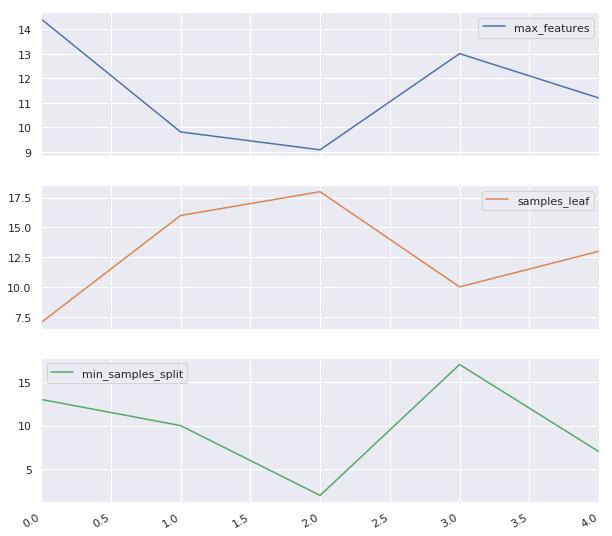

In [0]:
# Classification using Random Forests algorithm

rfc = RandomForestClassifier(random_state=0)
param_grid = {"min_samples_leaf": np.linspace(1, 20, 20, dtype=int),
              "min_samples_split": np.linspace(1, 20, 20, dtype=int)}

# Choose cross-validation techniques for the inner and outer loops,
# independently of the dataset.
inner_cv = KFold(n_splits=5, shuffle=True, random_state=0)
outer_cv = KFold(n_splits=5, shuffle=True, random_state=0)

# Non_nested parameter search and scoring
rfc_rs = RandomizedSearchCV(rfc, param_grid, cv=inner_cv,
                            scoring=make_scorer(avg_jaccard, greater_is_better=True),
                            n_iter=5, random_state=0)
rfc_rs.fit(X_tfidf_train, y_train)

# Nested CV with parameter optimization
nested_score = cross_val_score(rfc_rs, X=X_tfidf_train, y=y_train, cv=outer_cv)

print("Best hyperparameters on the training set:",
      rfc_rs.best_params_)
print("jaccard score : %.4f" % nested_score.mean())
    
rfc_rs_df=pd.DataFrame(np.transpose([rfc_rs.cv_results_['mean_test_score'],
                                     rfc_rs.cv_results_['param_min_samples_leaf'].data,
                                     rfc_rs.cv_results_['param_min_samples_split'].data]),
                           columns=['max_features', 'samples_leaf',
                                    'min_samples_split'])
rfc_rs_df.plot(subplots=True,figsize=(10, 10))

# Evaluation of the final model (OVR with linear SVC)

In [0]:
def plot_confusion_matrix(cm, classes, title, cmap=plt.cm.Reds):
    ''' This function prints and plots a normalized confusion matrix.
  
  Parameters:
      
      cm : the confusion matix 
      classes (list): the labels to diplay on the graph
      title (string): the title of the confusion matrix plot
      
  '''

    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.figure(figsize=(8,8))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, bbox={"pad":3, 'alpha': 0.5,"facecolor":'red'}, size=18)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.show()

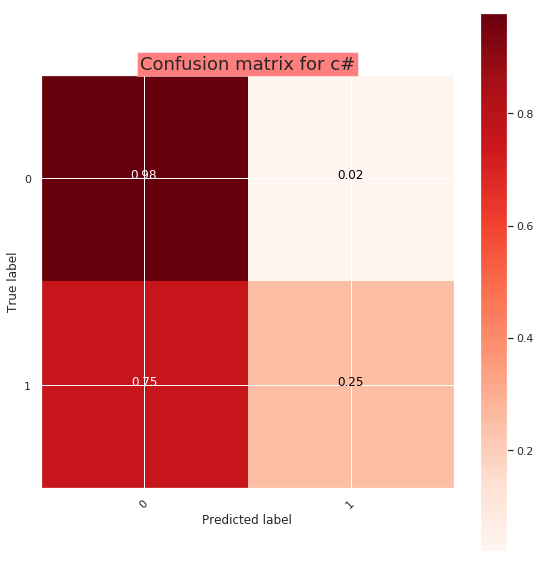

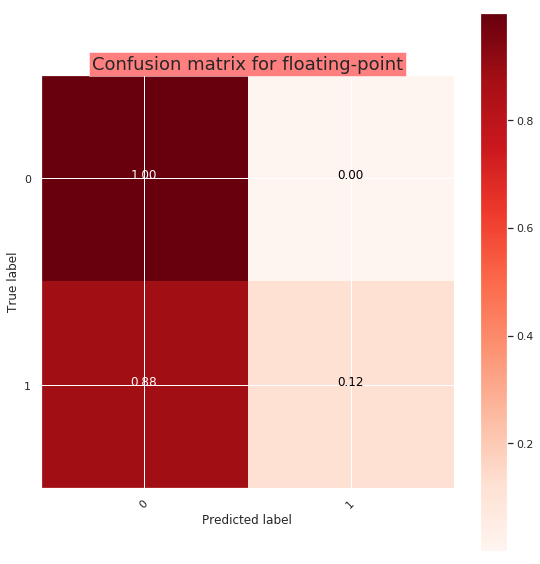

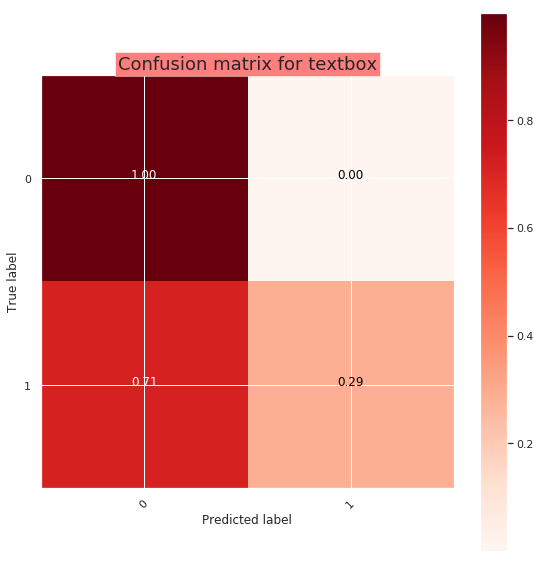

In [40]:
# Confusion matrix of the OneVersusRest Classifier for different tags

top_tag = np.where(multilabel_binarizer.classes_==top_tags[0])[0]
middle_tag = np.where(multilabel_binarizer.classes_==top_tags[199])[0]
bottom_tag = np.where(multilabel_binarizer.classes_==top_tags[399])[0]

for i in [top_tag, middle_tag, bottom_tag]:

    tag = (multilabel_binarizer.classes_[i])
    y_pred = svc_gs.predict(X_tfidf_test)
    cnf_matrix = confusion_matrix(y_test[:,i], y_pred[:,i])
    plot_confusion_matrix(cnf_matrix, classes=[0, 1],
                          title='Confusion matrix for %s' % tag[0])
    print("")

# There is no difference concerning the performance of OVR, for predicting 
# the different tags (popular or not)

In [41]:
# Jaccard Score of OVR on test set

svc_gs = OneVsRestClassifier(LinearSVC(random_state=0, C=1.0))
svc_gs.fit(X_tfidf_train, y_train)
y_pred = svc_gs.predict(X_tfidf_test)
jaccard = avg_jaccard(y_test, y_pred)
print('Jaccard score in percentage for OVR: %.2f' % jaccard)

Jaccard score in percentage for OVR: 29.99
